# Notebook de introdução à exploração de dados

Serão utilizadas, inicialmente, 2 base de dados. A primeira é uma base de dados de crédito e a segunda é uma base de dados de um censo. Serão feitas análises exploratória e o pré-processamento desses dados.

- Fonte (adaptado): https://www.kaggle.com/laotse/credit-risk-dataset - base de dados de crédito.

- Fonte: https://archive.ics.uci.edu/ml/datasets/adult - base de dados do censo.

# Tipos de variáveis

### Quantitativas (numéricas)

* Discretas: Informações representadas por números inteiros. 
    
    Ex.: Número de filhos, Número de carros, Número de hospitais, etc. 

* Contínuas: Informações representadas por números reais .
    
    Ex.: Temperatura, Altura, Peso, etc.

### Qualitativas (categóricas)

* Nominal: Dados não mensuráveis.

    Ex.: Cor dos olhos, gênero, nome, etc.

* Ordinal: Dados categorizados sob ordenação.

    Ex.: Tamanhos (P, M, G), escolaridade, etc.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.image as mpimg
import plotly.graph_objects as go
from kaleido.scopes.plotly import PlotlyScope


In [2]:
# caminho da pasta onde está o arquivo 
caminho = 'C:/Users/User/OneDrive/Capacitação/Portifolio_GitHub/Data_Science/data/'
# importar a base de dados de crédito
base_credit = pd.read_csv(caminho + 'credit_data.csv')

# Exploração dos dados

In [3]:
base_credit

i#clientid        income        age         loan  c#default
0              1  66155.925095  59.017015  8106.532131          0
1              2  34415.153966  48.117153  6564.745018          0
2              3  57317.170063  63.108049  8020.953296          0
3              4  42709.534201  45.751972  6103.642260          0
4              5  66952.688845  18.584336  8770.099235          1
...          ...           ...        ...          ...        ...
1995        1996  59221.044874  48.518179  1926.729397          0
1996        1997  69516.127573  23.162104  3503.176156          0
1997        1998  44311.449262  28.017167  5522.786693          1
1998        1999  43756.056605  63.971796  1622.722598          0
1999        2000  69436.579552  56.152617  7378.833599          0

[2000 rows x 5 columns]

- O atributo 'clientid' é uma variável qualitativa nominal, apesar de ser representada por números inteiros, os valores não representam quantidade e sim um identificador do cliente (o nome, cpf, entre outros, também são identificadores). Além disso, esse identificador não possui uma ordem (o cliente 5 não é mais importante do que o cliente 3, por exemplo).

- O atributo 'income' é uma variável de renda anual, ou sejá, é uma variável quantitativa contínua.

- O atributo 'age' é uma variável de idade que geralmente é quantitativa discreta, porém, nessa base de dados é apresentada como uma varável quantitativa contínua. 

- O atributo 'loan' é uma vareável da dívida que o cliente possui e é quantitativa contínua. 

- O atributo 'default' é uma variável que informa se a divida foi paga (0) ou não (1). 

In [4]:
base_credit.describe()

i#clientid        income          age          loan    c#default
count  2000.000000   2000.000000  1997.000000   2000.000000  2000.000000
mean   1000.500000  45331.600018    40.807559   4444.369695     0.141500
std     577.494589  14326.327119    13.624469   3045.410024     0.348624
min       1.000000  20014.489470   -52.423280      1.377630     0.000000
25%     500.750000  32796.459717    28.990415   1939.708847     0.000000
50%    1000.500000  45789.117313    41.317159   3974.719419     0.000000
75%    1500.250000  57791.281668    52.587040   6432.410625     0.000000
max    2000.000000  69995.685578    63.971796  13766.051239     1.000000

Essa função ajuda a descrever os dados, de forma que é possível observar que o atributo 'age' possui 3 dados faltantes, além disso, a idade mínima é negativa, sendo um erro da base de dados que deve ser tratado. 

Além disso, é possível explorar as informações de alguns desses valores, como por exemplo, identificar todas as informações do cliente que possui o maior salário. 

In [5]:
# Informações do cliente com o maior salário
base_credit[base_credit['income'] >= 69995.685578]

i#clientid        income        age         loan  c#default
422         423  69995.685578  52.719673  2084.370861          0

In [6]:
# Informações do cliente com a menor dívida
base_credit[base_credit['loan'] <= 1.377630]

i#clientid        income        age     loan  c#default
865         866  28072.604355  54.142548  1.37763          0

# Visualizar os dados

In [7]:
# Verificar a quantidade de resultados para cada categoria
np.unique(base_credit['c#default'], return_counts = True)

(array([0, 1], dtype=int64), array([1717,  283], dtype=int64))

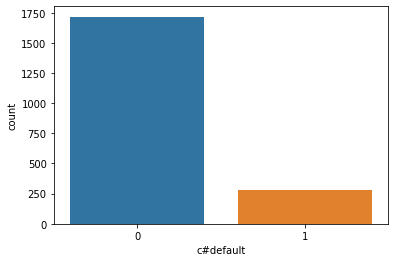

In [8]:
# Gráfico mostrando a quantidade de dados para cada categoria
sns.countplot(x = base_credit['c#default']);

Temos uma base de dados desbalanceada, onde temos muito mais dados de uma categoria do que da(s) outra(s). Nesse caso, temos 1717 empréstimos pagos e 283 empréstimos não pagos.

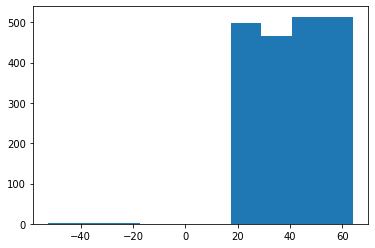

In [9]:
# Histograma da variável idade
plt.hist(x = base_credit['age']); # A quantidade de idades agrupadas é escolhida automaticamente pela função

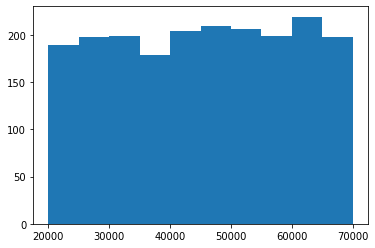

In [10]:
# Histograma da variável salário anual
plt.hist(x = base_credit['income']); # A quantidade de idades agrupadas é escolhida automaticamente pela função

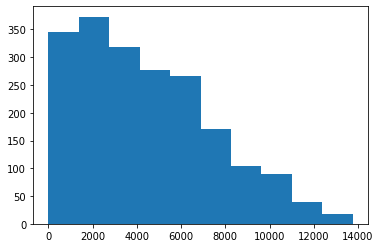

In [11]:
# Histograma da variável dívida
plt.hist(x = base_credit['loan']); # A quantidade de idades agrupadas é escolhida automaticamente pela função

É possível verificar que existem alguns valores inconsistentes para a variável idade, sendo algumas idades negativas. Além disso é possível observar que os dados de salário são bem distribuídos e que as dívidas possuem uma quantidade menor de acordo com o incremento do valor. 

In [39]:
grafico = px.scatter(x=range(10), y=range(10))
grafico = px.scatter_matrix(base_credit, dimensions=['age', 'income', 'loan'], color = 'c#default')
grafico.update_traces(diagonal_visible=False)
grafico.show()

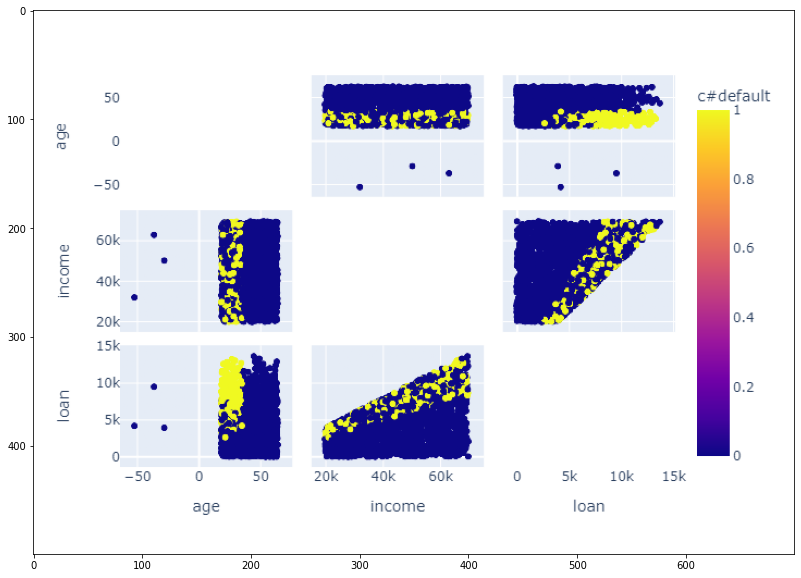

In [44]:
grafico.write_image("images/fig1.png", engine="kaleido")
img = mpimg.imread('images/fig1.png')
plt.figure(figsize=(15,10))
plt.imshow(img)
plt.show()

# Tratar valores inconsistentes

Como vimos, para a coluna de idades, tem-se alguns valores menores que 0, o que é totalmente inconsistente ao se tradar de idade. Para isso, será criado um filtro para identificar quais são os clientes que possuem esses dados. 

In [13]:
# Filtro para identificar os dados onde a idade está menor que zero
base_credit.loc[base_credit['age'] < 0] 
# Esse mesmo filtro pode ser feito com código comentado a baixo
#base_credit[base_credit['age'] < 0] 

i#clientid        income        age         loan  c#default
15          16  50501.726689 -28.218361  3977.287432          0
21          22  32197.620701 -52.423280  4244.057136          0
26          27  63287.038908 -36.496976  9595.286289          0

Para trabalhar com esses dados, temos algumas opções que podem ser seguidas de acordo com o tipo de dados, com a quantidade de dados. A escolha do que fazer com os valores inconsistentes é muito importante. Também é importante entender que esses valores inconsistentes são diferentes de outliers. Para os outliers, é importante conhecer muito bem os dados e qual o objetivo da análise para poder tomar a decisão sobre o que fazer com os outliers.

Para esse caso, temos que apenas 3 valores estão inconsistentes, então excluir essas linhas fará pouca diferença e é uma possibilidade viável nessa situação. 

In [14]:
# Encontrar os indexadores das linhas que devem ser excluidas
base_credit[base_credit['age'] < 0].index

Int64Index([15, 21, 26], dtype='int64')

In [15]:
# Excluir as linhas com idades menores que zero
base_credit2 = base_credit.drop(base_credit[base_credit['age'] < 0].index)

In [16]:
# Filtrar novamente para confirmar que não há linhas com idade menor que zero
base_credit2[base_credit2['age'] < 0]

Empty DataFrame
Columns: [i#clientid, income, age, loan, c#default]
Index: []

Uma outra forma de realizar o preenchimento desses dados, seria preenchendo esses dados manualmente, ou seja, entrando em contato com o cliente e pegando a informação de idade. Essa é a melhor forma de realizar o tratamento desses dados, porém pode ser caro, dependendo da quantidade de dados necessários e muitas vezes  inviável. 

Os métodos de aprendizagem de máquina apresentam melhores resultados com o aumento da quantidade de dados disponíveis, dessa forma, em alguns casos é importante encontrar uma forma de preencher esses valores inconsistentes. Uma possível forma é utilizando a média para substituir os valores inconsistentes. Mais um vez, é importante analisar os dados utilizados, o interesse da análise e tomar cuidado para essas substituição não agregar informações erradas aos dados. 


In [17]:
# A média da idade da base_credit2 é a média das idades ao eliminar os dados de idade < 0
base_credit2.mean()

i#clientid     1001.970456
income        45326.596720
age              40.927700
loan           4442.124566
c#default         0.141713
dtype: float64

In [18]:
age_mean = base_credit2['age'].mean()

In [19]:
# Subistituir os valores de idade que são < 0 para o valor da média das idades
base_credit.loc[base_credit['age'] < 0, 'age'] = age_mean

In [20]:
# Encontrar a idade para o cliente de index 15, que possuia valor de idade < 0 
base_credit.iloc[15]

i#clientid       16.000000
income        50501.726689
age              40.927700
loan           3977.287432
c#default         0.000000
Name: 15, dtype: float64

Agora podemos gerar novamente os gráficos de idade e o que relaciona as variáveis.

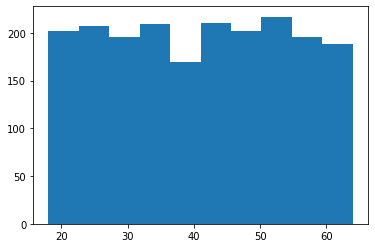

In [21]:
# Histograma da variável idade depois de tratar os dados de idade < 0
plt.hist(x = base_credit['age']);

In [22]:
grafico = px.scatter_matrix(base_credit, dimensions=['age', 'income', 'loan'], color = 'c#default')
grafico.show()

# Tratar valores faltantes

In [23]:
base_credit.describe()

i#clientid        income          age          loan    c#default
count  2000.000000   2000.000000  1997.000000   2000.000000  2000.000000
mean   1000.500000  45331.600018    40.927700   4444.369695     0.141500
std     577.494589  14326.327119    13.261825   3045.410024     0.348624
min       1.000000  20014.489470    18.055189      1.377630     0.000000
25%     500.750000  32796.459717    29.072097   1939.708847     0.000000
50%    1000.500000  45789.117313    41.317159   3974.719419     0.000000
75%    1500.250000  57791.281668    52.587040   6432.410625     0.000000
max    2000.000000  69995.685578    63.971796  13766.051239     1.000000

Podemos observar, na linha 'count', que a coluna 'age' possui menos dados que as demais, ou seja, alguns clientes estão com esse campo não preenchido. 

In [24]:
# Identificar valores não preenchidos. False para valores preenchidos e True para valores não preenchidos
base_credit.isnull()

i#clientid  income    age   loan  c#default
0          False   False  False  False      False
1          False   False  False  False      False
2          False   False  False  False      False
3          False   False  False  False      False
4          False   False  False  False      False
...          ...     ...    ...    ...        ...
1995       False   False  False  False      False
1996       False   False  False  False      False
1997       False   False  False  False      False
1998       False   False  False  False      False
1999       False   False  False  False      False

[2000 rows x 5 columns]

In [25]:
# Somar a quantidade de vezes que o atributo isnull apareceu como True
base_credit.isnull().sum() 

i#clientid    0
income        0
age           3
loan          0
c#default     0
dtype: int64

Dessa forma, podemos observar que em 3 campos, o atributo 'age' não foi preenchido

In [26]:
# Filtrar os registor que os dados são nulos
base_credit.loc[pd.isnull(base_credit['age'])]

i#clientid        income  age         loan  c#default
28          29  59417.805406  NaN  2082.625938          0
30          31  48528.852796  NaN  6155.784670          0
31          32  23526.302555  NaN  2862.010139          0

Utilizando a mesma estratégia anterior, ou seja, utilizando as média para substituir os valores faltantes, podemos fazer:

In [27]:
# Uma forma mais direta de substituir os valores NaN pela média
base_credit['age'].fillna(base_credit['age'].mean(), inplace = True)

In [28]:
# Filtrar os registor que os dados são nulos para confirmar que foram eliminados
base_credit.loc[pd.isnull(base_credit['age'])]

Empty DataFrame
Columns: [i#clientid, income, age, loan, c#default]
Index: []

In [29]:
# Uma forma de filtrar os clientes desejados é
base_credit.loc[(base_credit['i#clientid'] == 29) | (base_credit['i#clientid'] == 31) | (base_credit['i#clientid'] == 32)]

i#clientid        income      age         loan  c#default
28          29  59417.805406  40.9277  2082.625938          0
30          31  48528.852796  40.9277  6155.784670          0
31          32  23526.302555  40.9277  2862.010139          0

Dessa forma, podemos observar que os valores faltantes foram, agora, preenchidos com a média

In [30]:
# Uma outra forma de utilizar o pandas para identificar linhas específicas
base_credit.loc[base_credit['i#clientid'].isin([29, 31, 32])]

i#clientid        income      age         loan  c#default
28          29  59417.805406  40.9277  2082.625938          0
30          31  48528.852796  40.9277  6155.784670          0
31          32  23526.302555  40.9277  2862.010139          0

# Separar os dados em previsores e classes

Previsores são as informações que serão utilizadas para o algoritmo aprender e a classe é o resultado. 

Nessa base de dados, podemos observar que o index e nem o 'clientid' são informações que ajudam na previsão, já que o id do cliente é apenas um identificador que não tem relação com o pagamento ou não da dívida. Para facilitar o entendimento, podemos pensar no id do cliente como o nome do cliente, dessa forma fica mais claro que não podemos dizer que clientes do nome Pedro pagam as dívidas e os clientes com o nome Gabriela não pagam. Dessa forma, essas informações não são úteis para o aprendizado.

In [31]:
# selecionar os dados previsores
x_credit = base_credit.iloc[:, 1:4]
x_credit.head()

income        age         loan
0  66155.925095  59.017015  8106.532131
1  34415.153966  48.117153  6564.745018
2  57317.170063  63.108049  8020.953296
3  42709.534201  45.751972  6103.642260
4  66952.688845  18.584336  8770.099235

As bibliotecas de aprendizagem geralmente necessitam dos dados no tipo numpy array, para isso é necessária a conversão dessa tabela pandas.

In [32]:
# Uma forma de obter os dados do pandas para numpy
x_credit = x_credit.values
x_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [33]:
# Para confirmar o tipo de variável
type(x_credit)

numpy.ndarray

Fazendo o mesmo processo para os dados das classes, temos:

In [34]:
y_credit = base_credit.iloc[:, 4].values
y_credit

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [35]:
type(y_credit)

numpy.ndarray

# Normalizar/Padronizar os Dados

É importante ter dados normalizados pois os algoritmos de aprendizagem de máquina não conseguem fazer essa abstração, ou seja, o algoritmo pode dar um peso maior para variáveis com valores mais altos, como por exemplo, a variável salário terá um peso muito maior na análise do que a variávei idade, dessa forma os algoritmos costumam ter uma performace pior, principalmente para algoritmos baseados em distâncias, como o KNN e Redes Neurais.

O Cálculo da normalização é:

$$ x =  \frac{x - min(x)}{max(x) - min(x)}$$ 

Podemos, também, usar a padronização de dados. A padronização é mais indicada quando os dados possuem muitos outliers.

Seu cálculo é: 

$$ x =  \frac{x - mean(x)}{std(x)}$$ 

In [36]:
# Para verificar novamente as diferenças de escalas, temos os valores mínimos:
x_credit[:,0].min(), x_credit[:,1].min(), x_credit[:,2].min()

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [37]:
# Para verificar novamente as diferenças de escalas, temos os valores máximos:
x_credit[:,0].max(), x_credit[:,1].max(), x_credit[:,2].max()

(69995.6855783239, 63.971795841120205, 13766.0512393337)

In [38]:
# Importar a biblioteca para realizar a padronização dos dados
from sklearn.preprocessing import StandardScaler

In [39]:
scaler_credit = StandardScaler()
X_credit =  scaler_credit.fit_transform(x_credit)

In [40]:
# Para verificar novamente as diferenças de escalas, agora padronizadas, temos os valores mínimos:
X_credit[:,0].min(), X_credit[:,1].min(), X_credit[:,2].min()

(-1.7676158019964077, -1.7264154144794286, -1.4592791099462408)

In [41]:
# Para verificar novamente as diferenças de escalas, agora padronizadas, temos os valores máximos:
X_credit[:,0].max(), X_credit[:,1].max(), X_credit[:,2].max()

(1.7220222385319197, 1.739366520151568, 3.0616609141708273)

# Base de dados - Censo

Agora, utilizaremos outra base de dados para trabalhar com outros tipos de dados.

In [42]:
base_censo = pd.read_csv(caminho + 'census.csv')

In [43]:
base_censo

age          workclass  final-weight    education  education-num  \
0       39          State-gov         77516    Bachelors             13   
1       50   Self-emp-not-inc         83311    Bachelors             13   
2       38            Private        215646      HS-grad              9   
3       53            Private        234721         11th              7   
4       28            Private        338409    Bachelors             13   
...    ...                ...           ...          ...            ...   
32556   27            Private        257302   Assoc-acdm             12   
32557   40            Private        154374      HS-grad              9   
32558   58            Private        151910      HS-grad              9   
32559   22            Private        201490      HS-grad              9   
32560   52       Self-emp-inc        287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loos  hour-per-week  native-country  \
0         Male          2174             0             40   United-States   
1         Male             0             0             13   United-States   
2         Male             0             0             40   United-States   
3         Male             0             0             40   United-States   
4       Female             0             0             40            Cuba   
...        ...           ...           ...            ...             ...   
32556   Female             0             0             38   United-States   
32557     Male             0             0             40   United-States   
32558   Female             0             0             40   United-States   
32559     Male             0             0             20   United-States   
32560   Female         15024             0             40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

- Diferente da base de crédito, a coluna 'age' para a base censo é um atributo quantitativo discreto. 

- A coluna 'workclass' é uma atributo qualitativo nominal, pois não existe uma relação de ordem entre os dados.

- A coluna 'final-weight' é quantitativa discreta.

- A coluna 'education' é qualitativa ordinal, mas essa variável pode não ser importante para alguma análise, dessa forma ela pode ser classificada como nominal.

- A coluna 'education-num', 'capital-gain', 'capital-loos' e 'hour-per-week' quantitativa discreta.

- As colunas 'marital-status', 'occupation', 'relationship', 'race', 'sex' e 'native-country' são to tipo qualitativa nominal.

- A coluna 'income' é uma variável qualitativa ordinal.

In [44]:
base_censo.describe()

age  final-weight  education-num  capital-gain  capital-loos  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hour-per-week  
count   32561.000000  
mean       40.437456  
std        12.347429  
min         1.000000  
25%        40.000000  
50%        40.000000  
75%        45.000000  
max        99.000000

In [45]:
base_censo.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

Aqui é possível observar que não há dados faltantes (NaN), além disso é possível observar que não temos idades negativas e que os dados, no geral, estão consistentes. 

# Visualizar os dados

In [46]:
np.unique(base_censo['income'], return_counts = True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841], dtype=int64))

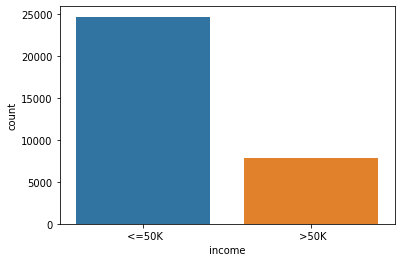

In [47]:
sns.countplot(x = base_censo['income']);

Essa base de dados também é desbalanceada, possui mais dados de uma classe do que da outra.

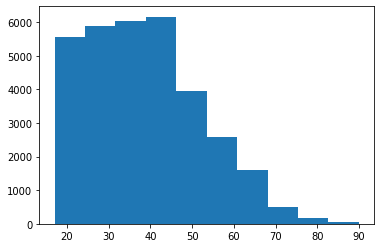

In [48]:
plt.hist(base_censo['age']);

É possível observar que a maioria dos dados são de pessoas com idades menores do que 50 anos.

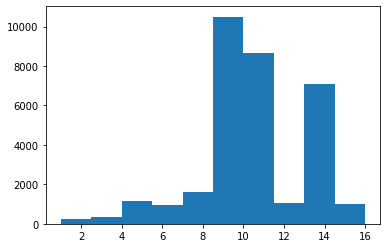

In [49]:
plt.hist(base_censo['education-num']);

Podemos observar que a maioria das pessoas estudam entre 9 e 11 anos.

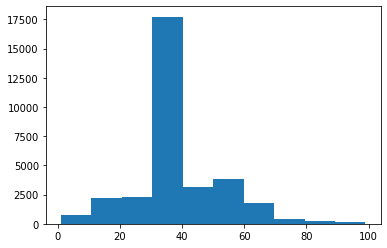

In [50]:
plt.hist(base_censo['hour-per-week']);

É possível observar que a grande maioria das pessoas trabalham entre 30 e 40 horas semanais

In [51]:
grafico = px.treemap(base_censo, path = ['workclass'])
grafico.show()

In [52]:
# dados agrupados por tipo de trabalho e idade
px.treemap(base_censo, path = ['workclass','age'])

Esse tipo de gráfico é muito bom para gerar agrupamentos de forma rápida e com fácil visualização.

In [53]:
px.treemap(base_censo, path = ['education','occupation','age'])

In [54]:
# Outra forma de visualizar as relações entre os dados
px.parallel_categories(base_censo, dimensions = ['occupation', 'education'])

In [55]:
px.parallel_categories(base_censo, dimensions = ['education', 'income'])

# Separar dados entre previsores e classes

In [56]:
base_censo.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [57]:
x_censo = base_censo.iloc[:,:14].values

In [58]:
x_censo

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [59]:
type(x_censo)

numpy.ndarray

In [60]:
y_censo = base_censo.iloc[:,14].values
y_censo

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

# Conversão dos atributos categóricos

### Label Encoder

In [61]:
from sklearn.preprocessing import LabelEncoder

Será criado um teste para exemplificar a função do LabelEncoder. A ideia dessa função é transformar dados das classes em atributos numéricos.

O label encoder não é muito utilizado para os dados previsores (dados de entrada) pois eles geram os dados com relação de superioridade, ou seja, se eu tiver 5 diferentes categorias para uma variável, elas serão substituídas por valores de 0 a 4, existindo uma correlação de superioridade. 

In [62]:
label_encoder_classe = LabelEncoder()

In [63]:
y_censo

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [64]:
label_encoder_y_censo = label_encoder_classe.fit_transform(y_censo)

In [65]:
label_encoder_y_censo

array([0, 0, 0, ..., 0, 0, 1])

In [66]:
Y_censo = label_encoder_y_censo
Y_censo

array([0, 0, 0, ..., 0, 0, 1])

### One Hot Encoder

O One Hot Encoder gera uma relação homogênia entre os dados, de forma que são geradas uma coluna para cada variável e os valores são 0 ou 1. O valor é 1 quando a coluna representa o dado e 0 quando a coluna não representa o dado.

Como exemplo: 

Cor dos olhos:

                -> Castanho --    Azul  --   Verde  --   Preto
    
Label Encoder  

                ->    0     --     1    --     2    --     3  
                
One Hot Encoder

                -> Castanho --    Azul  --   Verde  --   Preto    
      Castanho  ->     1    --     0    --     0    --     0
      Azul      ->     0    --     1    --     0    --     0
      Verde     ->     0    --     0    --     1    --     0
      Preto     ->     0    --     0    --     0    --     1

      
                

Como exemplo, para a coluna workclass, podemos verificar que existem 9 classes, ou seja, serão criadas 9 novas colunas para a base de dados. 

In [67]:
len(np.unique(base_censo['workclass']))

9

In [68]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [69]:
base_censo.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [70]:
base_censo.head()

age          workclass  final-weight   education  education-num  \
0   39          State-gov         77516   Bachelors             13   
1   50   Self-emp-not-inc         83311   Bachelors             13   
2   38            Private        215646     HS-grad              9   
3   53            Private        234721        11th              7   
4   28            Private        338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loos  hour-per-week  native-country  income  
0          2174             0             40   United-States   <=50K  
1             0             0             13   United-States   <=50K  
2             0             0             40   United-States   <=50K  
3             0             0             40   United-States   <=50K  
4             0             0             40            Cuba   <=50K

In [71]:
OneHotEncoder_censo = ColumnTransformer(transformers = [('OneHot', OneHotEncoder(), 
                                                         [1,3,5,6,7,8,9,13])], 
                                                        remainder = 'passthrough')

In [72]:
X_censo = OneHotEncoder_censo.fit_transform(x_censo).toarray()

In [73]:
X_censo[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [74]:
X_censo.shape

(32561, 108)

# Normalizar os dados

In [75]:
from sklearn.preprocessing import Normalizer

In [76]:
normalizer_censo = Normalizer()
X_censo = normalizer_censo.fit_transform(X_censo)

In [77]:
X_censo[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.28954883e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.28954883e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.28954883e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.28954883e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.28954883e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

# Divisão das bases de dados em treinamento e teste

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
# X_credit é os dados previsores. Y_credit são as classes. Test_size é o tamanho da base de dados que será usada como teste
X_credit_treinamento, X_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(X_credit, 
                                                                                              y_credit, 
                                                                                              test_size = 0.25, 
                                                                                              random_state = 0)

In [80]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [81]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [82]:
X_census_treinamento, X_census_teste, y_census_treinamento, y_census_teste = train_test_split(X_censo, y_censo, 
                                                                                              test_size = 0.15, 
                                                                                              random_state = 0)

In [83]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [84]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

# Salvar dados

In [85]:
import pickle

In [86]:
with open(caminho + 'credit.pkl', mode = 'wb') as f:
  pickle.dump([X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste], f)

In [87]:
with open(caminho + 'census.pkl', mode = 'wb') as f:
  pickle.dump([X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste], f)